# Ember Climate Data in Interactive Way in Jupyter

Barış Sanlı [barissanli2@gmail.com]

barissanli.com

This Jupyter notebook uses ipywidgets to interact with Ember Climate's monthly electricity data
<br/>
Works in [colab.research.google.com](colab.research.google.com)

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests 
from urllib.request import urlopen
from os.path import exists

In [2]:
from traitlets.traitlets import default
from IPython.display import display, clear_output
from ipywidgets import Dropdown

#### Download code for Ember Climate data

In [3]:
link="https://ember-climate.org/app/uploads/2022/07/monthly_full_release_long_format.csv"
# orjinal kod : https://stackoverflow.com/questions/65020294/downloading-a-zipped-file-using-python-3-7
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)            

#### Check whether file was downloaded before

In [4]:
if exists("./ember.csv"):
    print("File already exists");
else:
    download_url(link,"./ember.csv")

#### Read the CSV file and match the figure size

In [5]:
df = pd.read_csv('ember.csv')

In [6]:
plt.rcParams["figure.figsize"] = (20,7)

#### Use the ipywidgets to interact with data

Dropdown(description='Country selection:', index=77, options=('Argentina', 'Armenia', 'Asia', 'Australia', 'Au…

Dropdown(description='Graph selection:', index=2, options=('Demand', 'Clean', 'Fossil', 'Gas and Other Fossil'…

Dropdown(description='Unit selection:', options=('TWh', '%', 'mtCO2', 'gCO2/kWh', 'EUR/MWh'), value='TWh')

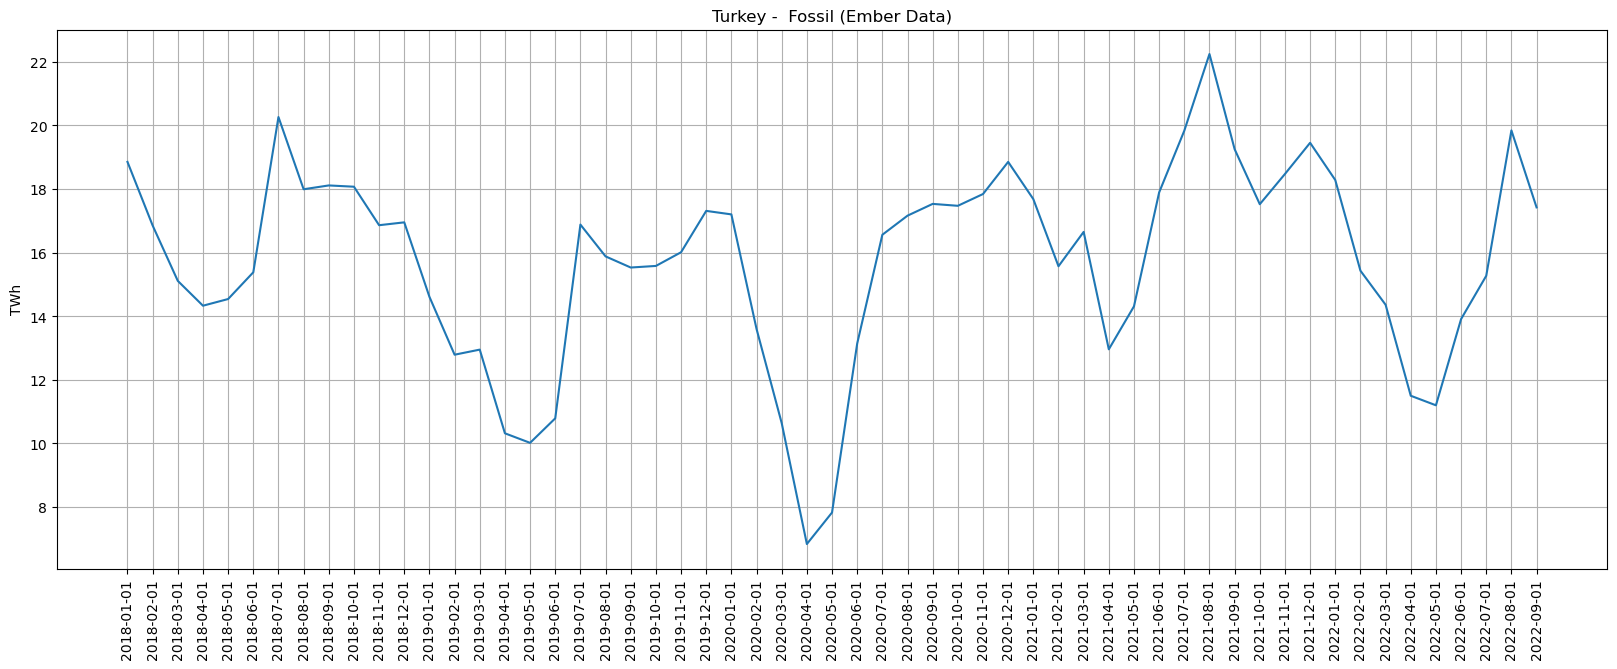

In [7]:
def dropdown_eventhandler(change):
  clear_output()
  dataset= df[(df.Area==dropdown.value) & (df.Variable==dropdown2.value) & (df.Unit==dropdown3.value)]
  plt.xticks(rotation=90)
  plt.plot(dataset.Date, dataset.Value)
  plt.title(dropdown.value + " -  "+dropdown2.value+" (Ember Data)")
  plt.ylabel(dropdown3.value)
  plt.grid("on")
  display(dropdown,dropdown2,dropdown3)

dropdown = Dropdown(description="Country selection:", options=df.Area.unique(),value="Turkey")
dropdown2 = Dropdown(description="Graph selection:", options=df.Variable.unique(),value="Demand")
dropdown3 = Dropdown(description="Unit selection:", options=df.Unit.unique(),value="TWh")

dropdown.observe(dropdown_eventhandler, names='value')
dropdown2.observe(dropdown_eventhandler, names='value')
dropdown3.observe(dropdown_eventhandler, names='value')

clear_output()
display(dropdown,dropdown2,dropdown3)